# WORLDWIDE SHARK ATTACKS ANALYSIS

Objective : In this notebook, we present a quick statistical analysis of worldwide shark attacks since 2000. The dataset has been extracted from Kaggle (URL: https://www.kaggle.com/teajay/global-shark-attacks). We will see the places where most attacks happen, fatality rate of attacks, sharks species involved and context of attacks (victim's activity). At the end of this notebook, we will focus on the Reunion Island and attacks happening there. 

Author : Benoit Pierson

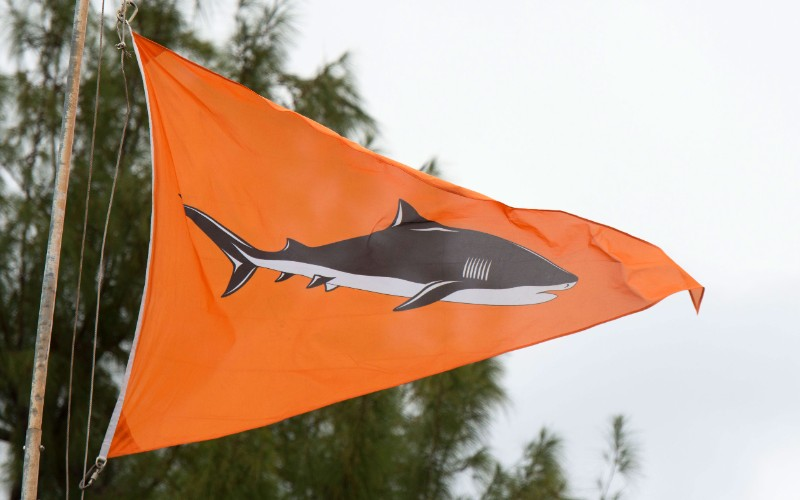

## 1 : Libraries import

In [14]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2 : Data loading & cleaning

In [15]:
# CSV file reading & selection of post 2000 attacks
df = pd.read_csv('attacks.csv', encoding='latin-1')
df = df.loc[df['Year'] >= 2000]

In [16]:
# Dataframe cleaning & date reshaping
df[['Year','Month','Day', 'Unnamed: 24', 'Unnamed: 25']] = df['Case Number'].str.split('.', expand=True)
del df['Unnamed: 22']
del df['Unnamed: 23']
del df['Unnamed: 24']
del df['Unnamed: 25']
df = df[['Date', 'Year', 'Month', 'Day', 'Time', 'Case Number', 'Case Number.1', 'Case Number.2', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Species ']]

In [17]:
df.head(5)

,Date,Year,Month,Day,Time,Case Number,Case Number.1,Case Number.2,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
0,25-Jun-2018,2018,06,25,18h00,2018.06.25,2018.06.25,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,18-Jun-2018,2018,06,18,14h00 -15h00,2018.06.18,2018.06.18,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,NaN
2,09-Jun-2018,2018,06,09,07h45,2018.06.09,2018.06.09,2018.06.09,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,08-Jun-2018,2018,06,08,NaN,2018.06.08,2018.06.08,2018.06.08,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,2 m shark
4,04-Jun-2018,2018,06,04,NaN,2018.06.04,2018.06.04,2018.06.04,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"


## 3 : Number of worldwide attacks per year

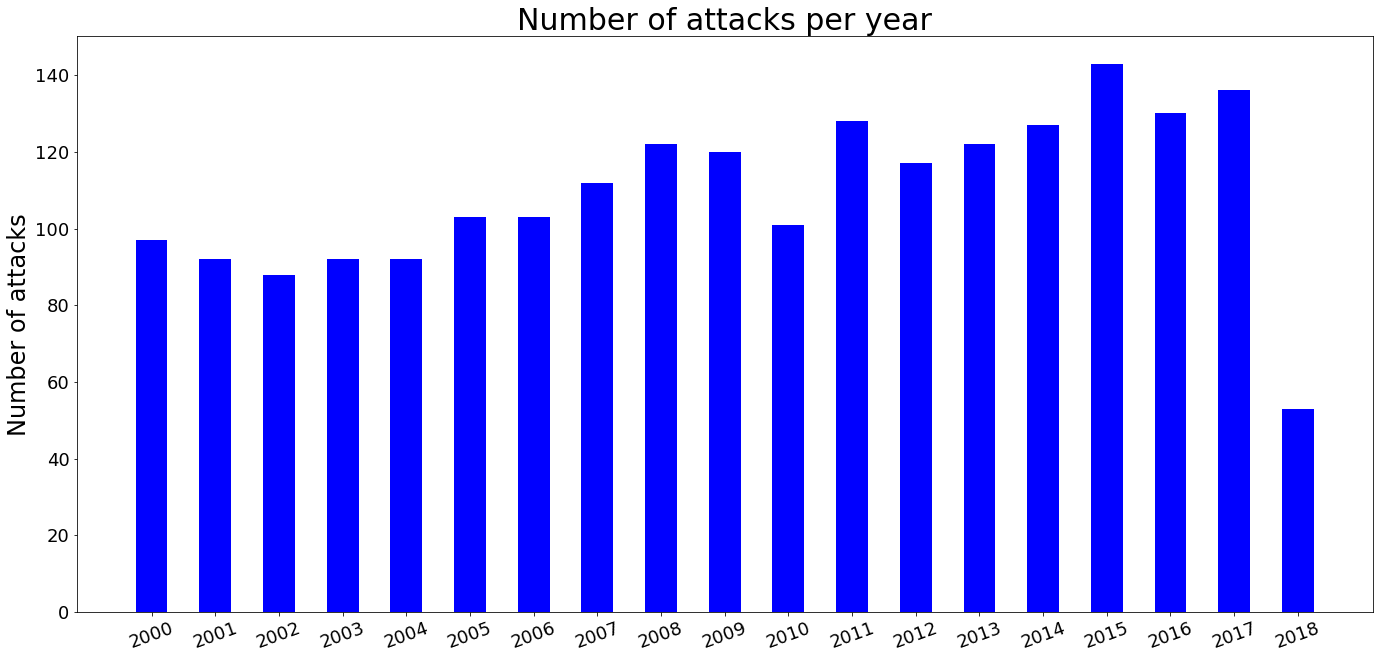

In [18]:
# Grouping attacks per year
df_attacks_per_year = df.groupby(["Year"])[['Case Number']].count().rename(columns={'Case Number':'Number of attacks'})

fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(df_attacks_per_year.index.tolist(), df_attacks_per_year['Number of attacks'].tolist(), width = 0.5, color = 'b')
ax.set_ylabel('Number of attacks', fontsize = 24)
ax.set_title('Number of attacks per year', fontsize = 30)
plt.setp(ax.get_xticklabels(), Fontsize = 18, rotation = 20)
plt.setp(ax.get_yticklabels(), Fontsize = 18)
plt.show()

## 4 :  Fatality rate of worldwide attacks per year

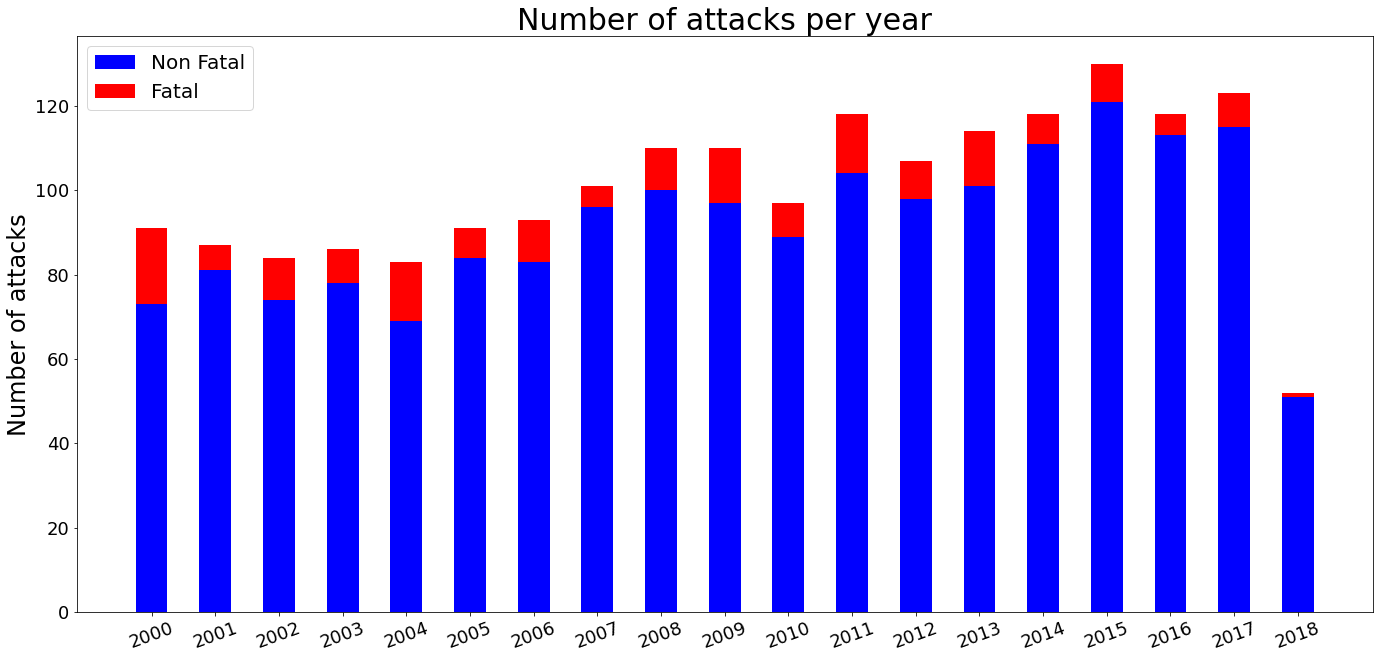

In [19]:
# Grouping attacks per year and fatality (fatal / non fatal)
df_attacks_per_year = df.groupby(['Year', 'Fatal (Y/N)'])[['Case Number']].count().rename(columns={'Case Number':'Number of attacks'}).reset_index()

# Division of fatal / non fatal attacks
df_fatal_attacks_per_year = df_attacks_per_year.loc[df_attacks_per_year['Fatal (Y/N)'] == 'Y']
df_non_fatal_attacks_per_year = df_attacks_per_year.loc[df_attacks_per_year['Fatal (Y/N)'] == 'N']

# Plot of an histogram of fatal and non fatal attacks
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(df_fatal_attacks_per_year['Year'].tolist(), df_non_fatal_attacks_per_year['Number of attacks'].tolist(), width = 0.5, color = 'b')
ax.bar(df_fatal_attacks_per_year['Year'].tolist(), df_fatal_attacks_per_year['Number of attacks'].tolist(), bottom = df_non_fatal_attacks_per_year['Number of attacks'].tolist(), width = 0.5, color = 'r')
ax.set_ylabel('Number of attacks', fontsize = 24)
ax.set_title('Number of attacks per year', fontsize = 30)
plt.setp(ax.get_xticklabels(), Fontsize = 18, rotation = 20)
plt.setp(ax.get_yticklabels(), Fontsize = 18)
ax.legend(labels=['Non Fatal', 'Fatal'], fontsize = 20)
plt.show()

## 5 : Sharks' attacks locations

In [20]:
# Quick renaming of some places
df.loc[df['Country'] == 'ST HELENA, British overseas territory', 'Country'] = 'ST HELENA'
df.loc[df['Country'] == 'Sierra Leone', 'Country'] = 'SIERRA LEONE'
df.loc[df['Country'] == 'Fiji', 'Country'] = 'FIJI'

df_attacks_per_location = df.groupby(['Country'])[['Case Number']].count().rename(columns={'Case Number':'Number of attacks'}).reset_index()
df_top_locations_attacks = df_attacks_per_location.sort_values(by=['Number of attacks'], ascending = False).reset_index(drop = True)
top_country = df_top_locations_attacks['Country'].iloc[0:10].tolist()
df_top_locations_attacks.loc[df_top_locations_attacks['Country'].isin(top_country) == False, 'Country'] = 'OTHER'
df_top_locations_attacks = df_top_locations_attacks.groupby(['Country'])[['Number of attacks']].sum().reset_index().sort_values(by = ['Number of attacks'], ascending = False)

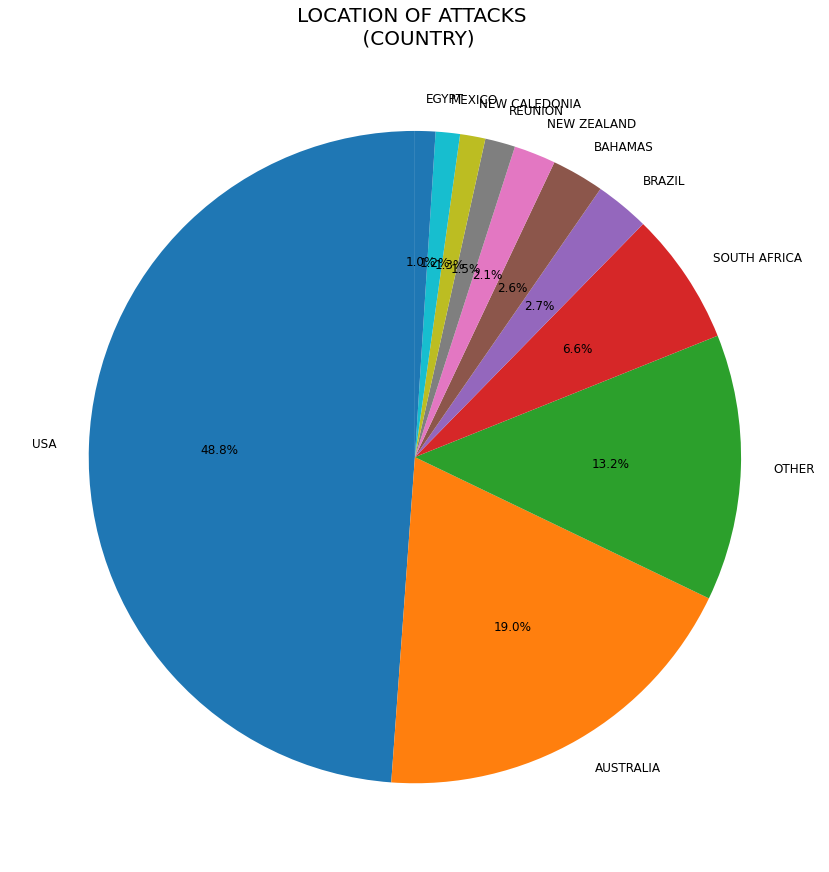

In [21]:
fig = plt.figure(figsize=(15,15))
plt.pie(df_top_locations_attacks['Number of attacks'].tolist(), labels = df_top_locations_attacks['Country'].tolist(), autopct = '%1.1f%%', shadow = False, startangle = 90, textprops={'fontsize': 12})
plt.title('LOCATION OF ATTACKS \n (COUNTRY)', size = 20)
plt.show()

## 6 : Sharks' species for deadly attacks (when identified)

In [22]:
df_fatal_attacks = df.loc[df['Fatal (Y/N)'] == 'Y']
df_fatal_attacks.loc[df_fatal_attacks['Species '].isna(), 'Species '] = 'Not identified'
df_fatal_attacks['Shark type'] = 'Not identified'

# Grouping sharks named differently but refering to the same type of shark
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('Oceanic|OCEANIC|oceanic|whitetip|white tip|White tip|White Tip|Whitetip|WHITETIP'), 'Shark type'] = 'OCEANIC WHITETIP SHARK\n(carcharhinus longimanus)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('white|White|WHITE'), 'Shark type'] = 'GREAT WHITE SHARK\n(carcharodon carcharias)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('Tiger|TIGER|tiger'), 'Shark type'] = 'TIGER SHARK\n(galeocerdo cuvier)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('Bull|bull|BULL|Zambezi|ZAMBEZI|zambezi'), 'Shark type'] = 'BULL SHARK\n(carcharhinus leucas)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('hammerhead|Hammerhead|HAMMERHEAD'), 'Shark type'] = 'GREAT HAMMERHEAD\n(sphyrna mokarran)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('Blacktip|blacktip|BLACKTIP'), 'Shark type'] = 'BLACKTIP SHARK\n(carcharhinus limbatus)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('Spinner|spinner'), 'Shark type'] = 'SPINNER SHARK\n(carcharhinus brevipinna)'
df_fatal_attacks.loc[df_fatal_attacks['Species '].str.contains('Mako|mako'), 'Shark type'] = 'MAKO SHARK\n(isurus oxyrinchus)'

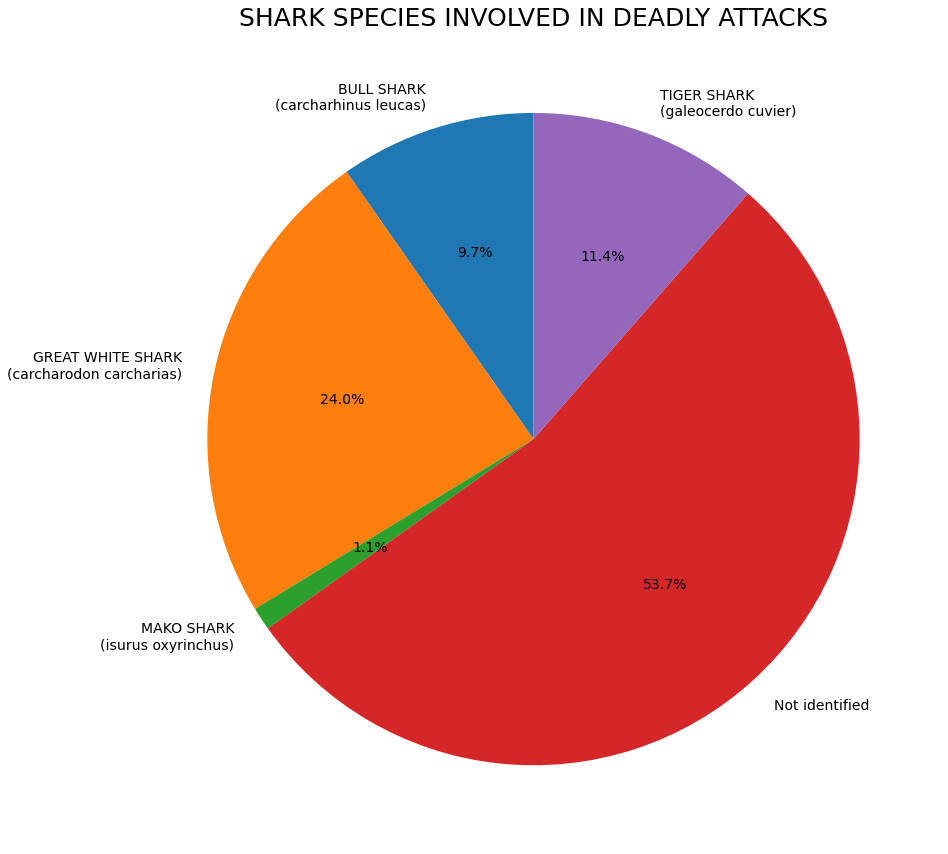

In [23]:
df_deadly_sharks = df_fatal_attacks.groupby(['Shark type'])[['Case Number']].count().rename(columns={'Case Number':'Number of deadly attacks'}).reset_index()

fig = plt.figure(figsize=(15,15))
plt.pie(df_deadly_sharks['Number of deadly attacks'].tolist(), labels = df_deadly_sharks['Shark type'].tolist(), autopct = '%1.1f%%', shadow = False, startangle = 90, textprops={'fontsize': 14})
plt.title('SHARK SPECIES INVOLVED IN DEADLY ATTACKS', size = 25)
plt.show()

## 7 : Activities during deadly attacks

In [24]:
df_fatal_attacks = df.loc[df['Fatal (Y/N)'] == 'Y']
df_fatal_attacks.loc[df_fatal_attacks['Activity'].isna(), 'Activity'] = 'Not identified'
df_fatal_attacks['Activity cat'] = 'OTHER'

df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('scuba|Scuba|Diving|diving'), 'Activity cat'] = 'SCUBA DIVING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('Snorkeling|snorkeling'), 'Activity cat'] = 'SNORKELING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('kayak|Kayak|canoe|Canoe'), 'Activity cat'] = 'KAYAKING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('Fishing|fishing'), 'Activity cat'] = 'FISHING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('Swimming|swimming|bathing|Bathing|Jumped into the water'), 'Activity cat'] = 'SWIMMING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('Spearfishing|spearfishing'), 'Activity cat'] = 'SPEARFISHING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('Surfing|surfing|surf|Paddling|paddling|paddle|Bodyboarding|Body boarding|bodyboarding|Boogie Boarding'), 'Activity cat'] = 'SURFING'
df_fatal_attacks.loc[df_fatal_attacks['Activity'].str.contains('Kite|kite'), 'Activity cat'] = 'KITE SURFING'
df_fatal_attacks.loc[df_fatal_attacks['Type'].str.contains('drowned|Sea disaster'), 'Activity cat'] = 'SHIPWRECK'

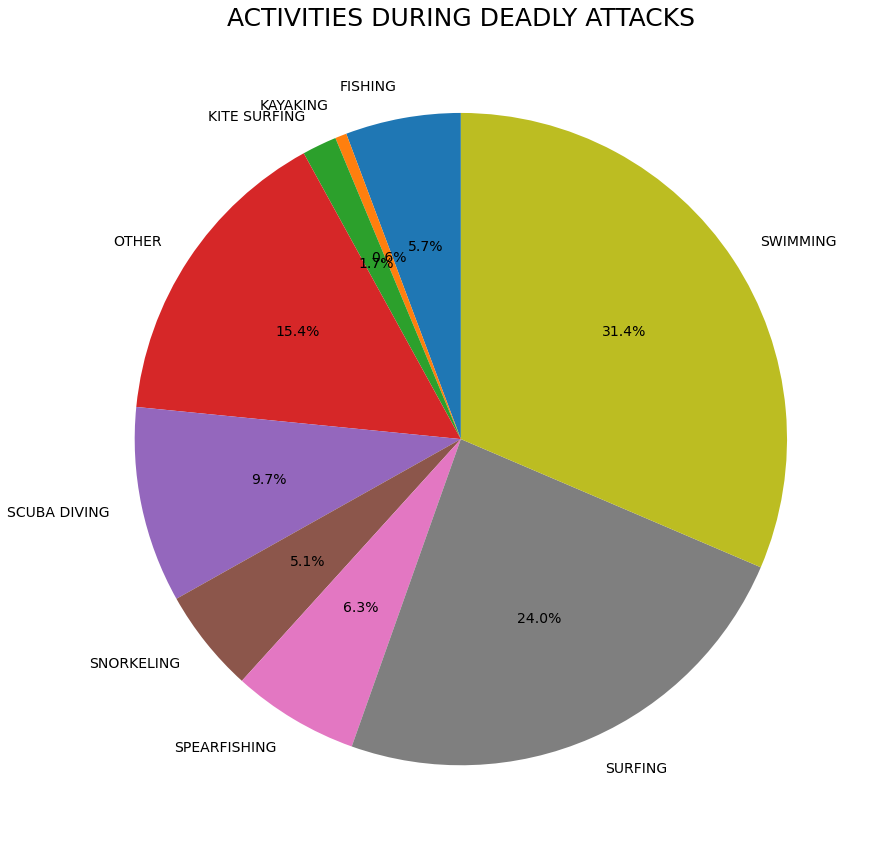

In [25]:
df_deadly_activities = df_fatal_attacks.groupby(['Activity cat'])[['Case Number']].count().rename(columns={'Case Number':'Number of deadly attacks'}).reset_index()

fig = plt.figure(figsize=(15,15))
plt.pie(df_deadly_activities['Number of deadly attacks'].tolist(), labels = df_deadly_activities['Activity cat'].tolist(), autopct = '%1.1f%%', shadow = False, startangle = 90, textprops={'fontsize': 14})
plt.title('ACTIVITIES DURING DEADLY ATTACKS', size = 25)
plt.show()

## 8 : Specific focus on Reunion Island attacks

Objective : This part has been motivated by the huge debate (involving environmental organizations, surfers' community) raising by sharks' attacks in Reunion Island. We will try to put these attacks in a worldwide perspective to see if Reunion Island's attacks can be considered as specific.

In [26]:
df_reunion = df.loc[df['Country'] == 'REUNION']
df_reunion.head(5)

,Date,Year,Month,Day,Time,Case Number,Case Number.1,Case Number.2,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Species
129,18-Jun-2017,2017,06,18,10h00,2017.06.18.a,2017.06.18.a,2017.06.18.a,Unprovoked,REUNION,NaN,Roches Noire,Body boarding,M,34,"No injury, shark bit surfboard",N,"Bull shark, 2m"
149,29-Apr-2017,2017,04,29,11h15,2017.04.29.a,2017.04.29.a,2017.04.29.a,Unprovoked,REUNION,Saint-Leu,Pointe au Sal,Body boarding,M,28,FATAL,Y,NaN
174,21-Feb-2017,2017,02,21,09h30,2017.02.21,2017.02.21,2017.02.21,Unprovoked,REUNION,Saint-Andre,NaN,Body boarding,M,26,Fatal,Y,NaN
229,27-Aug-2016,2016,08,27,17h00,2016.08.27,2016.08.27,2016.08.27,Unprovoked,REUNION,NaN,Boucan Canot,Surfing,M,20,"Right arm severed, ankle severely bitten",N,"Bull shark, 3.5 m"
388,22-Jul-2015,2015,07,22,NaN,2015.07.22,2015.07.22,2015.07.22,Unprovoked,REUNION,NaN,St. Leu,Surfing,M,45,Arm bitten,N,"Bull shark, 2m"


In [103]:
# Evolution du nombre d'attaques par an
# Periode de l'année ou plus d'attaques
# Heure de la journée ou le plus d'attaques
# Activités durant les attaques
# Fatality rate of sharks' attacks
# Type de requins impliqué dans les attaques

In [76]:
df_reunion_per_year = df_reunion.groupby(['Year', 'Fatal (Y/N)'])[['Case Number']].count().rename(columns={'Case Number':'Number of attacks'}).reset_index().sort_values(by = 'Year')
df_reunion_per_year_fatal = df_reunion_per_year.loc[df_reunion_per_year['Fatal (Y/N)'] == 'Y']
df_reunion_per_year_non_fatal = df_reunion_per_year.loc[df_reunion_per_year['Fatal (Y/N)'] == 'N']

for year in [*range(2000, 2018)]:
    if str(year) not in df_reunion_per_year_fatal['Year'].tolist():
        df_reunion_per_year_fatal = pd.DataFrame({'Year' : [str(year)], 'Fatal (Y/N)' : ['Y'], 'Number of attacks' : [0]}).append(df_reunion_per_year_fatal, ignore_index = True)

for year in [*range(2000, 2018)]:
    if str(year) not in df_reunion_per_year_non_fatal['Year'].tolist():
        df_reunion_per_year_non_fatal = pd.DataFrame({'Year' : [str(year)], 'Fatal (Y/N)' : ['N'], 'Number of attacks' : [0]}).append(df_reunion_per_year_non_fatal, ignore_index = True)

df_reunion_per_year_fatal = df_reunion_per_year_fatal.sort_values(by = 'Year')
df_reunion_per_year_non_fatal = df_reunion_per_year_non_fatal.sort_values(by = 'Year')

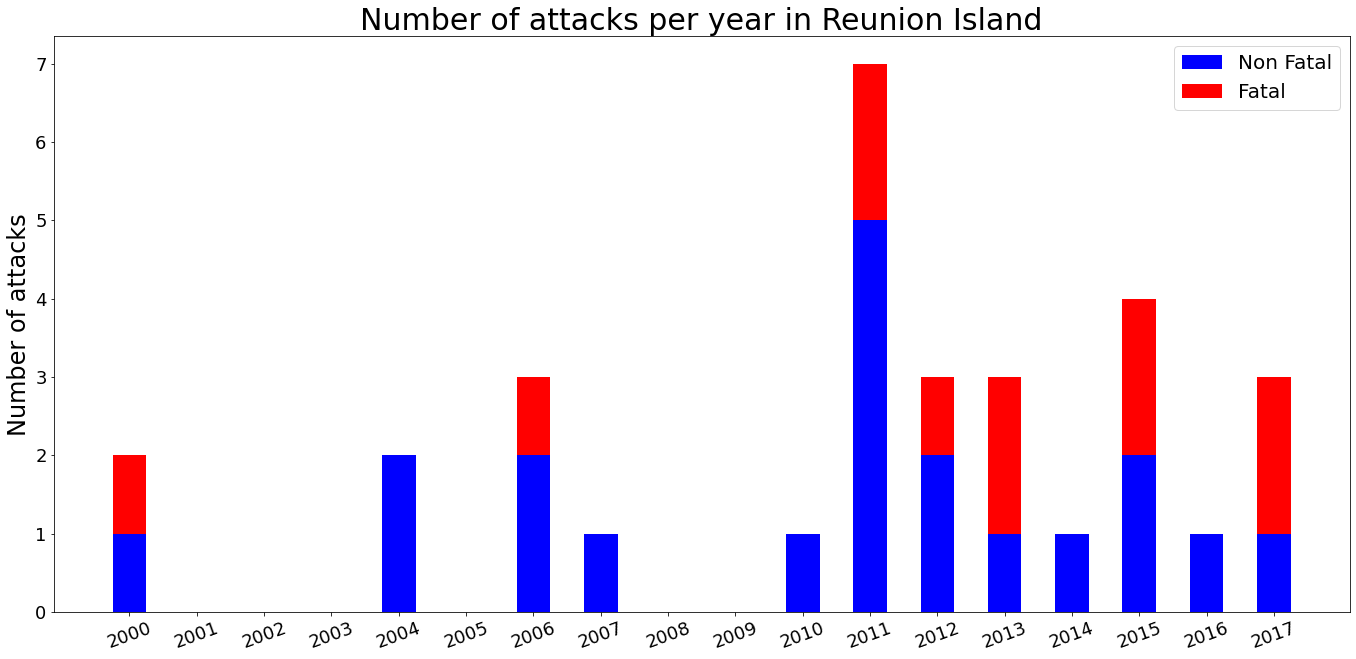

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
ax.bar(df_reunion_per_year_non_fatal['Year'].tolist(), df_reunion_per_year_non_fatal['Number of attacks'].tolist(), width = 0.5, color = 'b')
ax.bar(df_reunion_per_year_fatal['Year'].tolist(), df_reunion_per_year_fatal['Number of attacks'].tolist(), bottom = df_reunion_per_year_non_fatal['Number of attacks'], width = 0.5, color = 'r')
ax.set_ylabel('Number of attacks', fontsize = 24)
ax.set_title('Number of attacks per year in Reunion Island', fontsize = 30)
plt.setp(ax.get_xticklabels(), Fontsize = 18, rotation = 20)
plt.setp(ax.get_yticklabels(), Fontsize = 18)
ax.legend(labels=['Non Fatal', 'Fatal'], fontsize = 20)
plt.show()

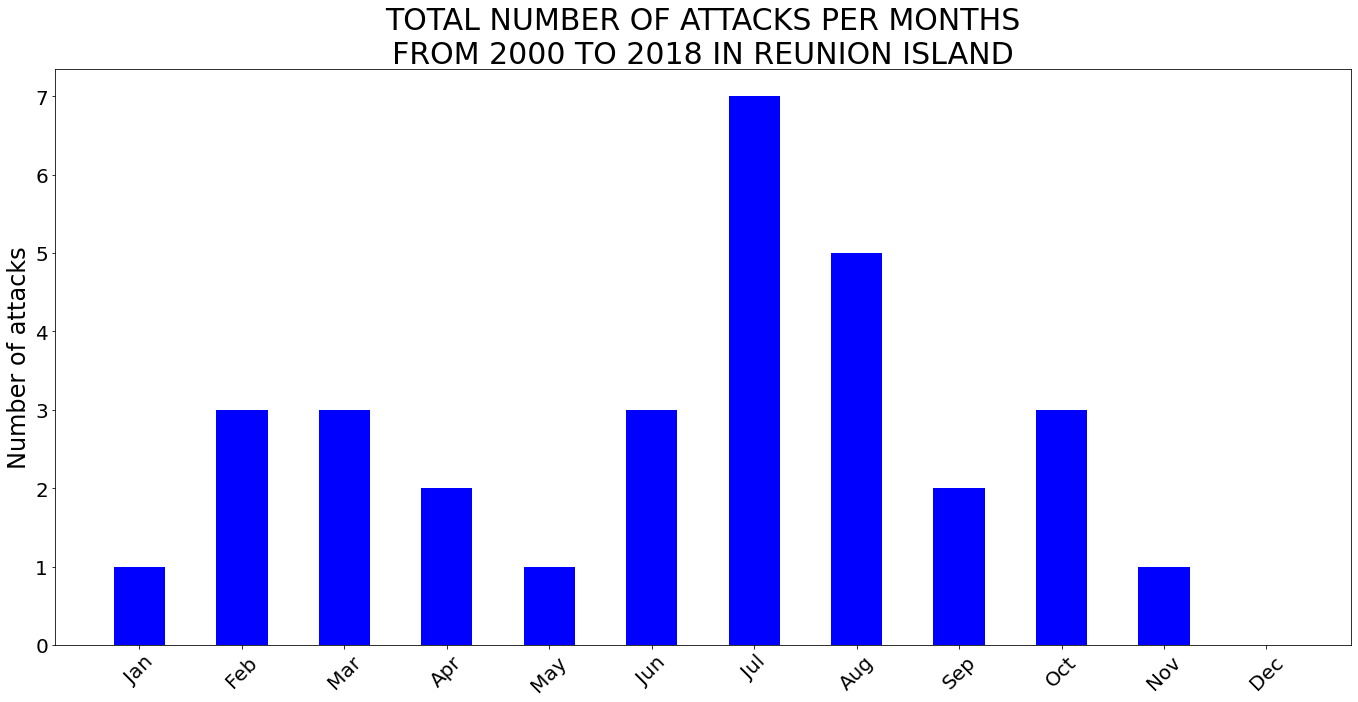

In [144]:
df_reunion_per_month = df_reunion.groupby(['Month'])[['Case Number']].count().rename(columns={'Case Number':'Number of attacks'}).reset_index()
df_reunion_per_month = pd.DataFrame({'Month' : ['12'], 'Number of attacks' : [0]}).append(df_reunion_per_month).sort_values(by = 'Month')

fig = plt.figure()
fig.add_axes([0,0,3,2])
plt.bar(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], df_reunion_per_month['Number of attacks'], color = 'b', width = 0.5)
plt.ylabel('Number of attacks', fontsize = 24)
plt.xticks(rotation = 45, Fontsize = 20)
plt.yticks(Fontsize = 20)
plt.title('TOTAL NUMBER OF ATTACKS PER MONTHS\nFROM 2000 TO 2018 IN REUNION ISLAND', size = 30)
plt.setp(ax.get_xticklabels(), Fontsize = 18, rotation = 20)
plt.show()

In [147]:
df_fatal_reunion = df_reunion.loc[df['Fatal (Y/N)'] == 'Y']
df_fatal_reunion.loc[df_fatal_reunion['Species '].isna(), 'Species '] = 'Not identified'
df_fatal_reunion['Shark type'] = 'Not identified'

# Grouping sharks named differently but refering to the same type of shark
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('Oceanic|OCEANIC|oceanic|whitetip|white tip|White tip|White Tip|Whitetip|WHITETIP'), 'Shark type'] = 'OCEANIC WHITETIP SHARK\n(carcharhinus longimanus)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('white|White|WHITE'), 'Shark type'] = 'GREAT WHITE SHARK\n(carcharodon carcharias)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('Tiger|TIGER|tiger'), 'Shark type'] = 'TIGER SHARK\n(galeocerdo cuvier)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('Bull|bull|BULL|Zambezi|ZAMBEZI|zambezi'), 'Shark type'] = 'BULL SHARK\n(carcharhinus leucas)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('hammerhead|Hammerhead|HAMMERHEAD'), 'Shark type'] = 'GREAT HAMMERHEAD\n(sphyrna mokarran)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('Blacktip|blacktip|BLACKTIP'), 'Shark type'] = 'BLACKTIP SHARK\n(carcharhinus limbatus)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('Spinner|spinner'), 'Shark type'] = 'SPINNER SHARK\n(carcharhinus brevipinna)'
df_fatal_reunion.loc[df_fatal_reunion['Species '].str.contains('Mako|mako'), 'Shark type'] = 'MAKO SHARK\n(isurus oxyrinchus)'

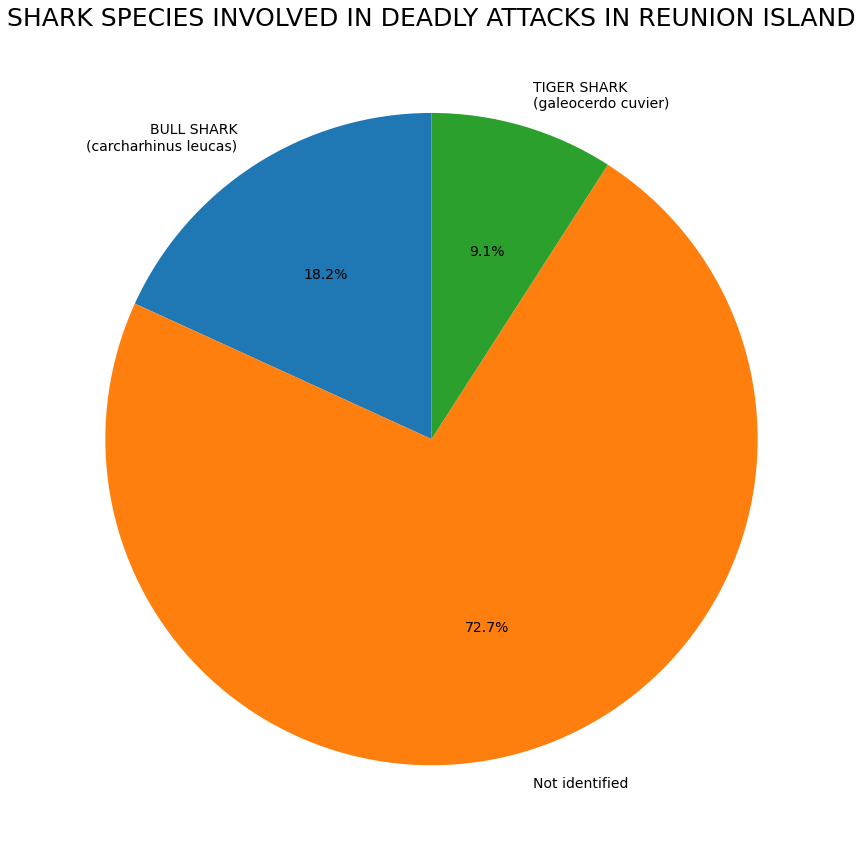

In [150]:
df_deadly_sharks = df_fatal_reunion.groupby(['Shark type'])[['Case Number']].count().rename(columns={'Case Number':'Number of deadly attacks'}).reset_index()

fig = plt.figure(figsize=(15,15))
plt.pie(df_deadly_sharks['Number of deadly attacks'].tolist(), labels = df_deadly_sharks['Shark type'].tolist(), autopct = '%1.1f%%', shadow = False, startangle = 90, textprops={'fontsize': 14})
plt.title('SHARK SPECIES INVOLVED IN DEADLY ATTACKS IN REUNION ISLAND', size = 25)
plt.show()